# How to use ta.py

In this file you can find some examples on how to use the ta.py script.

## Import ta.py

First you have to import the ta.py code. Make sure its in the same directory as your current file.

In [2]:
# %config InlineBackend.figure_format = 'svg' 
# useful but not needed settings (only for Jupyter Notebooks), displays figure as svg instead of png

from ta import TAData, TAMeasurementRow

## Import your measurement data

To import your measurement data, you need to specify the directory, in which your data is stored, as well as the filename (without .csv).

In [11]:
path1 = r"exemplary_data"
file1 = "untipped_DRs_h2o_400nm_30uW"
path2 = r"exemplary_data"
file2 = "tipped_400nm_30uW_scan1"

You need to create an instance of the TAData class for every measurement like shown below. The script automatically reads in the metadata from your csv data file (Surface Xplorer writes the metadata to the end of the csv file when exporting to csv). This metadata comes from the information you type into the window that pops up in the experiments software when the measurement is finished. So make sure to save meaningful metadata to your measurements directly after the measurement. It comes in handy when using this script and also it is good scientific practise to do so. However, if you want to change the metadata for some reason or if your measurement file comes without metadata (e.g. if you only one of the scans, Surface Xplorer will not write write metadata when exporting to csv), you can do as shown below. 

In [12]:
untipped = TAData(path1, file1) # create an instance of TAData class for the measurement of interest
untipped.sample, untipped.pumpfluence = "DRs", "30" # change metadata (samplename and employed pumpfluence)

tipped = TAData(path2, file2)
tipped.sample, tipped.pumpfluence = r"Pt-DRs", "30"

## Plot spectra and dynamics

Most often you will need to plot the differential spectra and the dynamics of your TA data. See below

L:\Yannic\Python\2022\OOP\git\ta.py:526: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
L:\Yannic\Python\2022\OOP\git\ta.py:405: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: plot_dynamics() missing 1 required positional argument: 'wl_to_be_plotted'

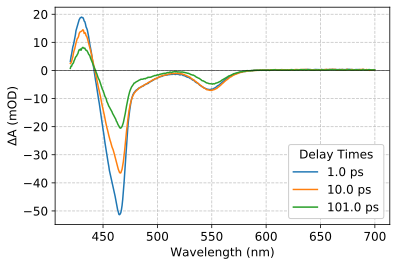

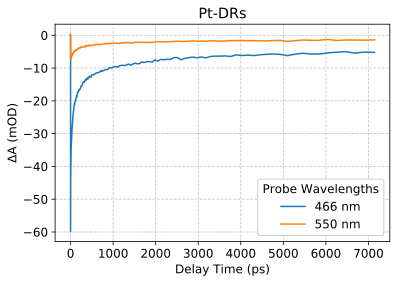

In [13]:
tipped.plot_spectra()
tipped.plot_dynamics(wl_to_be_plotted = [466,550])
tipped.plot_dynamics()

You can customize to plot by giving arguments to the .plot_spectra() or .plot_dynamics() functions. Check the ta.py file or type help(TAData.plot_spectra) to see which arguments you might give. Some functions have standart values for some arguments, e.g. see tipped.plot_spectra() above. If you do not specify the delay times, you want to plot the differential spectrum of, it plot the spectra at 1, 10 and 100 ps delay time. In other functions you need to specify some values, see tipped.plot_dynamics above. If you do not specify which wavelengths you want to plot, an error will be raised.

L:\Yannic\Python\2022\OOP\ta\ta_work.py:526: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
L:\Yannic\Python\2022\OOP\ta\ta_work.py:405: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21ad56f1408>)

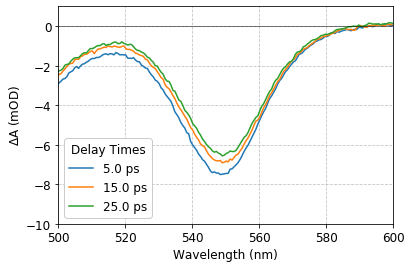

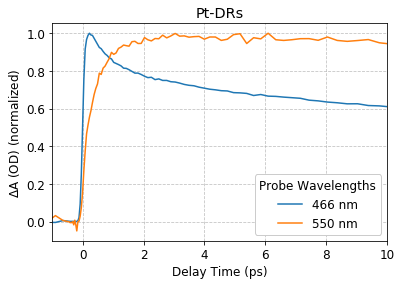

In [5]:
tipped.plot_spectra(tau_to_be_plotted = [5,15,25], xlim = [500,600], ylim = [-10,1])
tipped.plot_dynamics(wl_to_be_plotted = [466,550], normalize = "max", xlim = [-1,10])

In [6]:
help(TAData.plot_spectra)

Help on function plot_spectra in module ta_work:

plot_spectra(self, tau_to_be_plotted=[1, 10, 100], xlim=[], ylim=[], normalize=False, save=False)
    plot spectra at certain delay times
    provide delay times as list, eg. self.plot_spectra([1,10,100])



If you want to further customize the figures, you can save them to variables. These can then be changed with the standard matplotlib functions.

L:\Yannic\Python\2022\OOP\ta\ta_work.py:557: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


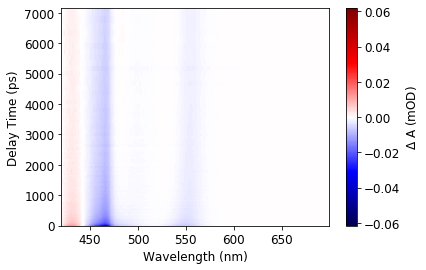

In [7]:
fig, ax = tipped.plot_map()

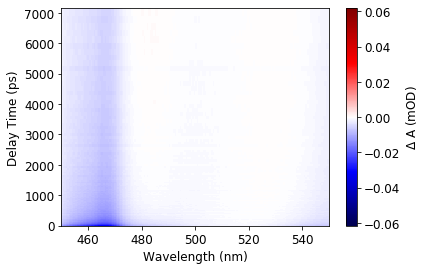

In [8]:
ax.set_xlim(450,550)
fig

## Compare Measurements
 
To compare measurements, you can initialize an instance of the TAMeasurementRow class. You can specify wether you want to compare different samples, or measurements of the same sample at different excitation fluences. The plots are then labeled accordingly.

In [9]:
comp = TAMeasurementRow(name = "Tipped vs. untipped DRs", discrimination = "sample") # initialze measurement row
comp.add_measurements([tipped, untipped]) # add measurements to measurement row

L:\Yannic\Python\2022\OOP\ta\ta_work.py:1672: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
L:\Yannic\Python\2022\OOP\ta\ta_work.py:1481: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


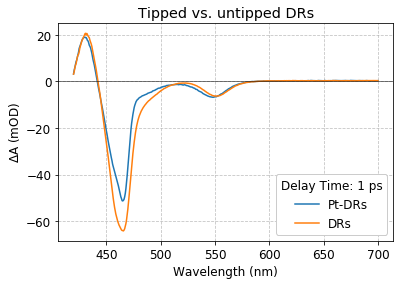

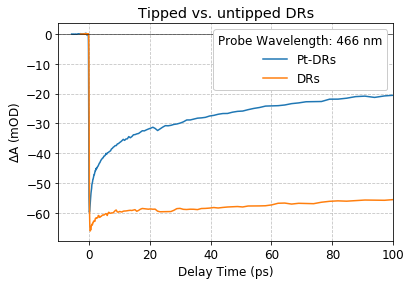

In [10]:
fig, ax = comp.compare_spectra(1)
fig, ax = comp.compare_dynamics(466, xlim = [-10,100])